In [1]:
import os 
from dotenv import load_dotenv
load_dotenv()


True

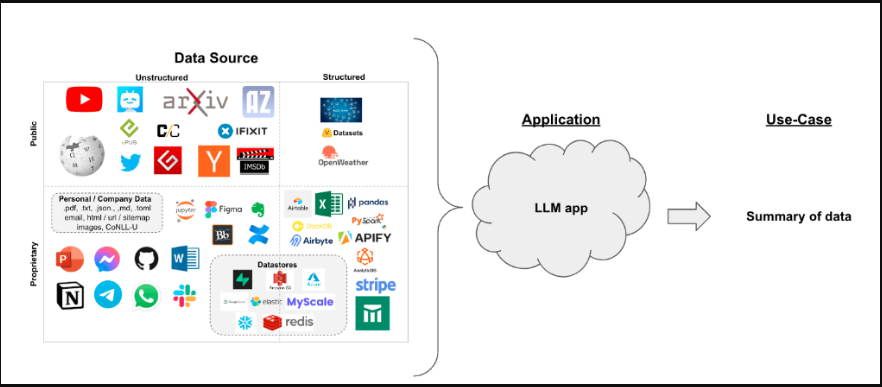

In [2]:
from langchain_groq import ChatGroq
api_key = os.getenv("GROQ_API_KEY")
llm = ChatGroq(groq_api_key=api_key,model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000020274C1CBF0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000020274C87A70>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
from langchain.schema import AIMessage,HumanMessage,SystemMessage

In [4]:
speech="""
People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.

In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [5]:
speech

'\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the gove

In [ ]:
chat_message=[
    SystemMessage(content="You are expert with expertise in summarizing speech"),
    HumanMessage(content=f'Please provide a short and concise summary of the follow speech:\n Text:{speech}')
]

In [16]:
llm.get_num_tokens(speech)

909

In [17]:
llm(chat_message)

AIMessage(content="Here's a summarized guide on how to make a bread omelet, highlighting the key steps:\n\n**Ingredients:**\n\n* Eggs\n* Bread slices\n* Butter or oil\n* Salt and pepper (to taste)\n* Optional fillings: cheese, vegetables, ham, etc.\n\n**Instructions:**\n\n1. **Prep the Bread:** Lightly toast bread slices until golden.\n2. **Cook the Eggs:** Whisk eggs with salt and pepper. Heat butter/oil in a pan. Pour eggs in and cook, stirring occasionally, until they start to set.\n3. **Assemble the Omelet:**  Place a toasted bread slice on a plate. Top it with the cooked egg mixture. Add your desired fillings.\n4. **Fold and Serve:** Carefully fold the egg mixture over the fillings.  Serve immediately!\n\n **Tips:**\n\n* For a fluffier omelet, add a splash of milk or cream to the eggs.\n* Don't overcook the eggs - they should be slightly runny in the center.\n* Get creative with your fillings!  \n\n\nLet me know if you'd like more detail on any specific step!\n", additional_kwargs

## Prompt Template Text Summarization

In [18]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

generictemplate ='''
write a summary of the following speech :
speech : {speech}
Translate the summary into language {language}'''

prompt = PromptTemplate(
    input_variables = ['speech','language'],
    template=generictemplate
)

prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template='\nwrite a summary of the following speech :\nspeech : {speech}\nTranslate the summary into language {language}')

In [19]:
complete_prompt = prompt.format(speech=speech,language='Kannada')
complete_prompt

'\nwrite a summary of the following speech :\nspeech : \nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their hou

In [20]:
llm.get_num_tokens(complete_prompt)

932

In [21]:
llm_chain = LLMChain(llm=llm,prompt=prompt)
summary = llm_chain.run({'speech':speech,'language':'kannada'})
summary

C:\Users\MONISH\AppData\Local\Temp\ipykernel_2780\632556468.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(llm=llm,prompt=prompt)
C:\Users\MONISH\AppData\Local\Temp\ipykernel_2780\632556468.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  summary = llm_chain.run({'speech':speech,'language':'kannada'})


"## ವಿಕ್ಷಿತಭಾರತ ಸಂಕಲ್ಪ ಯಾತ್ರೆ: ಮುಖ್ಯ ಅಂಶಗಳು - ಕನ್ನಡ ಅನುವಾದ\n\nನಿರ್ಮಾಣ, ರಾಜಕೀಯ ಮತ್ತು ಸಾಮಾಜಿಕ ಕ್ಷೇತ್ರಗಳಲ್ಲಿ ದುಡಿಯುವ ಜನರು 'ವಿಕ್ಷಿತಭಾರತ ಸಂಕಲ್ಪ ಯಾತ್ರೆ'ಯನ್ನು ಯಶಸ್ವಿಯಾಗಿಸಲು ತಮ್ಮ ಸಮಯವನ್ನು ಕೊಡುತ್ತಿದ್ದಾರೆ. ಸಂಸದರಾಗಿ, ಅದರಲ್ಲಿ ಭಾಗಿಯಾಗಲು ನಾನು ಬರಲಿಕ್ಕೆ ಬಂದಿದ್ದೇನೆ.\n\nಕಾಲಾನಂತರ ನಮ್ಮ ದೇಶದಲ್ಲಿ ಅನೇಕ ಸರ್ಕಾರಗಳು ಬಂದಿವೆ, ಅನೇಕ ಯೋಜನೆಗಳು ರೂಪುಗೊಂಡಿವೆ, ಚರ್ಚೆಗಳು ನಡೆದಿವೆ, ದೊಡ್ಡ ಹೆಸರಿನ ಮುದ್ದೆಗಳನ್ನೂ ನೀಡಲಾಗಿದೆ. ಆದರೆ ನನ್ನ ಅನುಭವ ಮತ್ತು ಅವಲೋಕನ ಮೂಲಕ, ಅತ್ಯಂತ ಮುಖ್ಯವಾದ ವಿಷಯವೆಂದರೆ, ಸರ್ಕಾರದ ಯೋಜನೆಗಳು ನಿರೀಕ್ಷಿತ ಲಾಭ ಪಾತ್ರರಿಗೆ ಅಡ್ಡಂಬಳಿಕವಿಲ್ಲದೆ ತಲುಪುವುದು ಎಂದು ನಾವು ತಿಳಿದಿದ್ದೇವೆ.  \n\n'ಪ್ರಧಾನ ಮಂತ್ರಿ ಆವಾಸ ಯೋಜನ' ಜಾರಿಯಾದಲ್ಲಿ, ಜುಗ್ಗಿ ಮತ್ತು ಸ್ಲಮ್ ನಲ್ಲಿ ವಾಸಿಸುವವರಿಗೆ ಮನೆ ಸಿಗಬೇಕು. ಅವರು ಸರ್ಕಾರದ ಕಚೇರಿಗಳಿಗೆ ಮುಂದೆ ಓಡಾಡಬೇಕಾಗಿರಬಾರದು. ಸರ್ಕಾರವೇ ಅವರಿಗೆ ಸೇರುತ್ತದೆ. ನೀವೇ ಎಂದು ನನ್ನ ಮೇಲೆ ಈ ಜವಾಬ್ದಾರಿಯನ್ನು ಒಪ್ಪಿಸಿದ್ದೀರಿ. ನಾನು ನೋಡಿದ್ದೇನೆ.  ಆದರೆ ನಾನು ಕೆಲವರು ಸರ್ಕಾರದ ಲಾಭದಿಂದ ಹೊರಗಿರುವುದನ್ನು ಕಂಡಿದ್ದೇನೆ. ಆದ್ದರಿಂದ, ನಾನು ಮತ್ತೆ ದೇಶದಾದ್ಯಂತ ಪ್ರವಾಸ ಮಾಡಲು ನಿರ್ಧರಿಸಿದ್ದೇನೆ, ಜನರ ಅನುಭವಗಳನ್ನು ತಿಳಿಯಲು, ಸರ್ಕಾರದ ಯೋಜನೆಗಳಿಂದ ಅವರು ನಿರೀಕ್ಷಿತ ಲಾಭವನ್ನು ಪಡೆದ್ದಾರೆ ಎಂಬುದನ್ನು ತಿಳಿಯಲು, ಮತ್ತು

In [22]:
llm.get_num_tokens(summary)

Token indices sequence length is longer than the specified maximum sequence length for this model (5220 > 1024). Running this sequence through the model will result in indexing errors


5220

## StuffDocumentChain Text summarization

In [23]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("apjspeech.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowi

In [24]:
template = """ write a concise and short summary of the speech :{text}"""

prompt = PromptTemplate(input_variables=['text'],
                        template=template)

In [25]:
from langchain.chains.summarize import load_summarize_chain

chain = load_summarize_chain(llm , chain_type='stuff' ,prompt=prompt,verbose=True)
output_summary = chain.run(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
 write a concise and short summary of the speech :A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have

"In his departing speech, A.P.J. Abdul Kalam reflects on his five years as President of India, emphasizing the aspirations of the Indian youth and the need for national development. \n\nHe highlights ten key themes:\n\n1. **Accelerate Development:** The youth's desire for a developed India by 2020 should drive progress. \n2. **Empower Villages:** Villages need to be empowered with resources and infrastructure for growth.\n3. **Rural Core Competence:** Utilizing rural strengths for competitiveness through innovative projects like PURA.\n4. **Seed to Food:** Doubling agricultural production through sustainable practices and empowering farmers.\n5. **Defeat Problems:** Overcoming challenges with perseverance and positive attitude, exemplified by a physically challenged musician.\n6. **Partnership in Disaster Relief:** Coming together to overcome calamities like the earthquake in Kashmir.\n7. **Connectivity for Transformation:** Utilizing technology to connect nations through projects like

### Map reduce to Summarize Large documents

In [26]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [27]:
docs 

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowi

In [28]:
final_documents = RecursiveCharacterTextSplitter(chunk_size = 2000,chunk_overlap=100).split_documents(docs)
final_documents

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowi

In [29]:
len(final_documents)

13

In [31]:
chunks_prompt="""
Please summarize the below speech:
Speech:`{text}'
Summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                    template=chunks_prompt)

In [32]:
final_prompt='''
Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:{text}

'''

final_prompt_template = PromptTemplate(input_variables=['text'],template=final_prompt)
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='\nProvide the final summary of the entire speech with these important points.\nAdd a Motivation Title,Start the precise summary with an introduction and provide the summary in number \npoints for the speech.\nSpeech:{text}\n\n')

In [33]:
summary_chain = load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    map_prompt=map_prompt_template,
    combine_prompt=final_prompt_template,verbose=True
)

output=summary_chain.run(final_documents)



> Entering new MapReduceDocumentsChain chain...


> Entering new <unknown> chain...
Prompt after formatting:

Please summarize the below speech:
Speech:`A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have 

### Refine Chain For Summarization

In [34]:
chain=load_summarize_chain(
    llm=llm,
    chain_type="refine",
    verbose=True
)
output_summary=chain.run(final_documents)
output_summary



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have man

'In his farewell address, A.P.J. Abdul Kalam reflects on his five years as President of India, highlighting the nation\'s progress and the spirit of its people. He expresses gratitude for the diverse interactions he\'s had and emphasizes the importance of preserving India\'s rich cultural heritage while pursuing economic growth.\n\nKalam shares ten key messages gleaned from his experiences, focusing on youth aspirations, rural empowerment, agricultural growth, and national defense. He recounts a poignant question from a young girl, Anukriti, who inquired about India\'s development timeline, showcasing the nation\'s youthful ambition. \n\nHe underscores the potential of rural India through the Periyar PURA project, which provides urban amenities to rural areas, leading to economic growth and entrepreneurship. Kalam details the project\'s success in creating employment, fostering entrepreneurship, and transforming waste land into cultivable land.  He also shares his experience meeting wi